# Домашнее задание №7: деревья, случайный лес (14.5 баллов)

## Часть 1: основы построения решающие дерева

начнём с простого...

### Задание 1.1 (1 балл)
Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 - $k_2$. Посчитайте энтропию (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar

In [2]:
np.linspace(0,1,1000)

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [116]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 1, 1, 1])

In [117]:
def kol(l):
    return np.sum(a + b + l**2)

In [ ]:
def 

In [139]:
int(minimize(lambda l: np.mean(a - b +l**2), 66).x)

0

In [7]:
 np.sum(a + b)

20

In [27]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

In [157]:
# Работающий
class GradientBoosting:
    def __init__(self, n_estimators = 100, max_depth = 3, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.models = []
        self.gamma = 1
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        
        for i in range(self.n_estimators):
            if i == 0:
                tree = DecisionTreeRegressor(max_depth = self.max_depth)
                tree.fit(x, y)
                self.models.append([1,tree])
            
            else:
                y_pred = 0
                for j in range(i):
                    y_pred +=   self.models[j][0] * self.models[j][1].predict(x)
                y_new = y - y_pred
                self._fit_predict_tree(x, y_pred, y_new, y)


    def _fit_predict_tree(self, x, y_pred, y_new, y):
        
        tree = DecisionTreeRegressor(max_depth = self.max_depth)
        tree.fit(x, y_new)
        gamma = minimize(lambda l: mean_squared_error( y, y_pred + 0.1 * l * tree.predict(x)), 1).x
        self.models.append([gamma * self.learning_rate, tree])  
        
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = 0
        
        for i in range(self.n_estimators):
            y_pred +=   self.models[i][0] * self.models[i][1].predict(x)
            
        return y_pred

In [155]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [158]:
rg = GradientBoosting(n_estimators = 8)
rg.fit(X_train, y_train)

In [153]:
from sklearn.model_selection import GridSearchCV

param_test = {
    "n_estimators": range(10, 400, 50),
    "max_depth" : range(1,15,1)
}
gsearch1 = GridSearchCV(estimator = GradientBoosting(), 
                       param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

TypeError: Cannot clone object '<__main__.GradientBoosting object at 0x1208dc790>' (type <class '__main__.GradientBoosting'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [114]:
mean_squared_error(y_test, rg.predict(X_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [80]:
# Работающий
class GradientBoosting:
    def __init__(self, n_estimators = 100, max_depth = 3, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.models = []
        self.gamma = 1
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        
        for i in range(self.n_estimators):
            if i == 0:
                tree = DecisionTreeRegressor(max_depth = self.max_depth)
                tree.fit(x, y)
                y_new = -2*(y - tree.predict(x))
                self.models.append([1,tree])
            
            else:
                y_pred = 0
                for j in range(i):
                    y_pred +=   self.models[j][0] * self.models[j][1].predict(x)
                y_new = -2*(y - y_pred)
                self._fit_predict_tree(x, y_new)    
            


    def _fit_predict_tree(self, x, y):
        
        tree = DecisionTreeRegressor(max_depth = self.max_depth)
        tree.fit(x, y)
        self.models.append([self.gamma * self.learning_rate, tree])  
        
        return self.gamma * self.learning_rate * tree.predict(x)

        
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = 0
        
        for i in range(self.n_estimators):
            y_pred +=   self.models[i][0] * self.models[i][1].predict(x)
            
        return y_pred

In [161]:
import pandas as pd

In [162]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering/flight_delays_test.csv')

In [165]:
from xgboost.sklearn import XGBClassifier

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

# xgb = XGBClassifier()
# xgb.fit(X_train_part, y_train_part)
# roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6991936584875171

In [168]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'max_depth':[2,3,4],
    'min_child_weight':[2,3,4,5,6,7]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27,
                                     subsample=None, t

In [169]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 5}, 0.7027212019885903)

In [171]:
param_test2 = {
    'gamma': np.linspace(0,1,3)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, min_child_weight= 5), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27,
                                     subsample=None, tree_me

In [172]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 1.0}, 0.7029830508702687)

In [173]:
param_test3 = {
    'subsample': [0.6,0.7,0.8,0.9,1.]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, min_child_weight= 5, 
                                                  gamma = 1), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27,
                                     subsample=None, tree_metho

In [174]:
gsearch3.best_params_, gsearch3.best_score_

({'subsample': 0.9}, 0.7035093478148771)

In [183]:
param_test4 = {
    'colsample_bytree': [0.6,0.7,0.8,0.9,1.]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, min_child_weight= 5, 
                                                  gamma = 1,subsample= 0.9), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:26:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.9,
                                     tree_method

In [185]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 1.0}, 0.7035093478148771)

In [186]:
param_test5 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, min_child_weight= 5, 
                                                  gamma = 1,subsample= 0.9, colsample_bytree = 1.0 ), 
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=1.0, gamma=1, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=150, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.9,
                                     tree_method=

In [187]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 1}, 0.7038125663913517)

In [190]:
param_test6 = {
    'learning_rate': [0.01, 0.05, 0.1],
    "n_estimators" : [15, 30, 45, 50, 65, 70, 85, 100, 125, 150]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27, min_child_weight= 5, 
                                                  gamma = 1,subsample= 0.9, colsample_bytree = 1.0, reg_alpha=1 ), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:31:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=1.0, gamma=1, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=4, min_child_weight=5,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=1, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.9,
                                     tree_method=No

In [191]:
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.1, 'n_estimators': 150}, 0.7038125663913517)

In [210]:
xgb = XGBClassifier(
        learning_rate =0.037,
        n_estimators=150,
        colsample_bytree = 1.0,
        max_depth=4,
        reg_alpha=1,
        min_child_weight= 5,
        gamma = 1,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        subsample= 0.9,
        seed=27)

xgb.fit(X_train_part, y_train_part)

/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:39:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.037, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [211]:
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

0.7006794320133073

Формула Энтропии в нашем случае будет выглядеть следующим образом (с данными из дано):

$\begin{cases}
H(R) = - \sum_{i=1}^{2}p_{i}ln(p)\\
p_{1}= 8/10\\
p_{2} = 2/10
 \end{cases} $  

In [3]:
p1 = 8/10
p2 = 2/10
H = - p1*np.log(p1) - p2*np.log(p2)
print(f"H = {round(H, 2)}")

H = 0.5


### Задание 1.2 (1 балл)
Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности (в формулировке разности impurity пришедшей выборки и полученного разбиения) такой вершины с применением индекса Джини. Ответ округлите до двух знаков после запятой.

Используя критерий информативности с индексом Джини, задача будет выглядеть следующим образом:

$\begin{cases}
H(R) = 1 - \sum_{i=1}^{2}p_{i}^{2}\\
Q = - \frac{|R_{l}|}{|R_{m}|}H(R_{l}) - \frac{|R_{r}|}{|R_{m}|}H(R_{r})\\
где R - разбиение (m - изначальное, r/l - дальнейшее)
 \end{cases} $

In [4]:
p21 = 8/8
HRl = 1 - p21 ** 2

p32 = 2/2
HRr = 1 - p32 ** 2

print(f"Q = {round( - 8/10 * HRl - 2/10* HRr, 2)}")

Q = -0.0


### Задание 1.3 (0.5 балла)
Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

Задачи регрессии в большем случае решаются с помощью задачи минимизации MSE. Так и поступим:

$H(R) = \frac{\sum(x_{i} - \theta)^{2}}{n}$

Из лекций по Теории Вероятности, известно, что минимальное значение ошибки достигается при принятии оценки равной среднему значению элементов выборки. Доверемся им:

In [5]:
x = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
print(f"Предсказание модели будет (если они могут быть не целыми) = {np.mean(x)}")
print(f"Предсказание модели будет (если только целыми) = {round(np.mean(x))}")

Предсказание модели будет (если они могут быть не целыми) = 40.6
Предсказание модели будет (если только целыми) = 41


## Часть 2: решающие деревья

### Задание 2.1 (2 балла)
Первым делом реализуйте функцию `find_best_split`, которая должна находить оптимальное разбиение подмножества обучающей выборки. При решении задачи регрессии испольуйте дисперсию подвыборки, при решении задачи классификации используйте критерий Джини. Эту функцию можно протестировать на датасете `Boston` из `sklearn`.

In [6]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]
X.head()

print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

При решении задания имейте в виду, что под критерием Джини подразумевается такая функция:

$$Q(R) = -\frac {|R_{\ell}|}{|R|}H(R_\ell) -\frac {|R_r|}{|R|}H(R_r) ,$$

где $R$ — множество объектов, попавших в вершину, $R_{\ell}$ и $R_r$ — объекты, попавшие в левое и правое поддеревья,
$H(R) = 1 - p_1^2 - p_0^2$, $p_1$, $p_0$ — доли объектов класса 1 и 0 соответственно.

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям (скачайте решённую версию ноутбука).

**Note:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла бонус 0.7 балла

In [14]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame], 
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    if feature_type == "real":
        modul_Rm = len(feature_vector)
        values = np.array(sorted(set(feature_vector)))
        
        if len(values) % 2 != 0: # Избавляюсь от списка из трех элементов, для вертикального поиска среднего в
            values = values[1:]  # в to_count_means

        to_count_means = np.array(np.split(values, len(values)/2))
        poroky = np.mean(to_count_means, axis=1)
        modul_Rr = np.vectorize(lambda porok: sum(feature_vector >= porok))(poroky) #Количество в прав лист
        modul_Rl = modul_Rm -  modul_Rr #Количество в  лев лист
        
        if task == "regression":
            H_Rr = np.vectorize(lambda porok: target_vector[feature_vector >= porok].var())(poroky) #Критер для правого 
            H_Rl = np.vectorize(lambda porok: target_vector[feature_vector < porok].var())(poroky) #Критер для левого
            Q = - (modul_Rr / modul_Rm) * H_Rr - (modul_Rl / modul_Rm) * H_Rl
        
        elif task == "classification":
            H_Rr = np.vectorize(lambda porok: 1 - target_vector[feature_vector >= porok].mean() ** 2  - (1- target_vector[feature_vector >= porok].mean()) ** 2)(poroky) #Критер для правого 
            H_Rl = np.vectorize(lambda porok: 1 - target_vector[feature_vector < porok].mean() ** 2 - (1-target_vector[feature_vector < porok].mean()) **2 )(poroky) #Критер для левого
            Q = - (modul_Rr / modul_Rm) * H_Rr - (modul_Rl / modul_Rm) * H_Rl
            
        return poroky, Q, poroky[np.argmax(Q)], float(max(Q))


    
    elif feature_type == "categorical":
       
        modul_Rm = len(feature_vector)
        poroky = np.array(set(feature_vector))
        modul_Rr = np.vectorize(lambda porok: sum(feature_vector == porok))(poroky) #Количество в прав лист
        modul_Rl = modul_Rm -  modul_Rr #Количество в  лев лист
        
        if task == "regression":
            H_Rr = np.vectorize(lambda porok: target_vector[feature_vector == porok].var())(poroky) #Критер для правого 
            H_Rl = np.vectorize(lambda porok: target_vector[feature_vector != porok].var())(poroky) #Критер для левого
            Q = - (modul_Rr / modul_Rm) * H_Rr - (modul_Rl / modul_Rm) * H_Rl
        
        elif task == "classification":
            H_Rr = np.vectorize(lambda porok: 1 - target_vector[feature_vector == porok].mean() ** 2  - (1- target_vector[feature_vector == porok].mean()) ** 2)(poroky) #Критер для правого 
            H_Rl = np.vectorize(lambda porok: 1 - target_vector[feature_vector != porok].mean() ** 2 - (1-target_vector[feature_vector != porok].mean()) **2 )(poroky) #Критер для левого
            Q = - (modul_Rr / modul_Rm) * H_Rr - (modul_Rl / modul_Rm) * H_Rl
            
        return poroky, Q, poroky[np.argmax(Q)], max(Q)
    

thresholds, variances, threshold_best, variance_best = find_best_split(
    X["CRIM"].to_numpy(), 
    y, 
    task="regression",
    feature_type="real"
)

Небольшое пояснение о массивном коде в данной задаче - Бесспорно, можно было бы составить маску для сравнения порогов с элементами вектора фичей, которая варьировалась лишь от типа фичей, что сократило бы код в два раза. Однако тогда было бы невозможно реализовать np.vectorize, а следовательно решалось бы только через цикл (

In [9]:
threshold_best

6.68632

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `CRIM`.

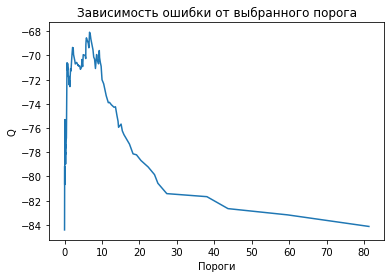

In [10]:
import matplotlib.pyplot as plt

plt.plot(thresholds, variances)
plt.title("Зависимость ошибки от выбранного порога")
plt.xlabel("Пороги")
plt.ylabel("Q")
plt.show()

### Задание 2.2 (3 балла)
Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод _predict_node.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- Выбор лучшего разбиения необходимо производить по критерию Джини
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку
- Ответ в листе: наиболее часто встречающийся класс в листе

In [17]:
class DecisionTree:
    def __init__(
        self, 
        feature_types: Union[List[str], np.ndarray], 
        max_depth: int = None, 
        min_samples_split: int = None, 
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:
        
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}
        
        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types
        
        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task

    def _fit_node(
        self,
        sub_X: np.ndarray,
        sub_y: np.ndarray,
        node: dict
    ) -> None:
        # критерий останова
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}
            feature_vector = sub_X[:, feature]
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)
            
            if gini_best is None or gini < gini_best:
                feature_best = feature
                gini_best = gini
                threshold_best = threshold
                
                if feature_type == "real":
                    split = (feature_vector <= threshold_best)
                
                elif feature_type == "categorical":
                    split = (feature_vector == threshold_best)
                
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return 

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
       
        else:
            raise ValueError
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        if node["type"] == "terminal":
            return node["class"]
        
        if self._feature_types[node['feature_split']] == 'real':
            
            if x[node['feature_split']] >= node['threshhold']:
                return self._predict_node(x, node['right_child'])
           
            else:
                return self._predict_node(x, node['left_child'])
            
        elif self._feature_types[node['feature_split']] == 'categorical':
            
            if x[node['feature_split']] == node['category_split']:
                return self._predict_node(x, node['right_child'])
            
            else:
                return self._predict_node(x, node['left_child'])    

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
            
        return np.array(predicted)

### Задание 2.3 (1 балл)
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [18]:
df = pd.read_csv('students.csv')
df.head(4)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1


In [19]:
df.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371860,0.356124,0.468023,0.432713,0.458527,0.585271
std,0.210093,0.211801,0.245926,0.248108,0.255217,0.493633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.210000,0.292500,0.250000,0.250000,0.000000
50%,0.330000,0.305000,0.490000,0.330000,0.500000,1.000000
75%,0.500000,0.497500,0.690000,0.647500,0.660000,1.000000
max,0.990000,0.900000,0.950000,0.990000,0.930000,1.000000


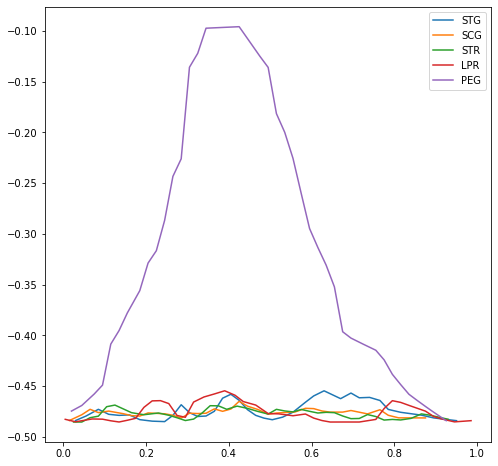

In [20]:
y = df[" UNS"].to_numpy()

plt.figure(figsize=(8, 8))
for i in df.columns[:-1]:
    thresholds, variances, _, _ = find_best_split(
    df[i].to_numpy(), 
    y, 
    task="classification",
    feature_type="real"
    )
    plt.plot(thresholds,variances)
  

    
plt.legend(df.columns)
plt.show()

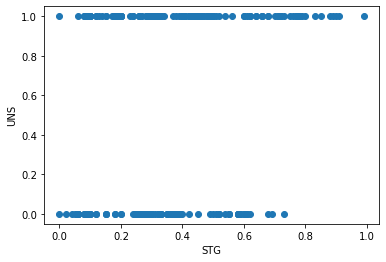

In [21]:
plt.scatter(df["STG"], df[" UNS"])
plt.xlabel("STG")
plt.ylabel("UNS");
plt.show()

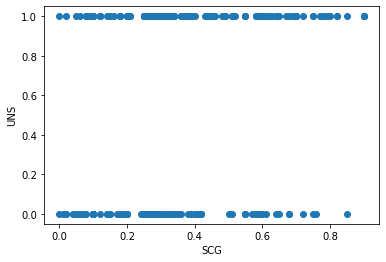

In [22]:
plt.scatter(df["SCG"], df[" UNS"])
plt.xlabel("SCG")
plt.ylabel("UNS");
plt.show()

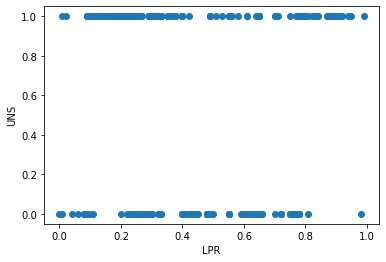

In [23]:
plt.scatter(df["LPR"], df[" UNS"])
plt.xlabel("LPR")
plt.ylabel("UNS");
plt.show()

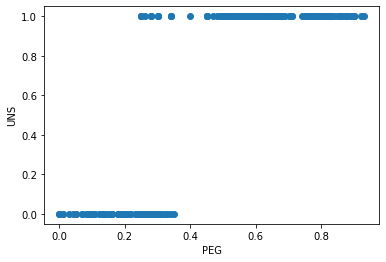

In [24]:
plt.scatter(df["PEG"], df[" UNS"])
plt.xlabel("PEG")
plt.ylabel("UNS");
plt.show()

### Задание 2.4 (1 балл)

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

1. Исходя из полученных данных, лучше начинать деление дерева с признака PEG - у него больший критерий информативности
2. Конечно - несмотря на наличие незначительных шумов при значениях ниже 0.4, разделение осуществими без значимых уменьшения точности дерева
3. Они больше приближены к 0 и значение их критерия информативности в несколько раз превшает "плохих". Можно даже заметить, что их кривые имеют меньше число экстремумов (1 / 2) )
4. Vice versa, то есть их кривые более изменчивы с большим число максимумов, ну и приближены к -0.5

### Задание 2.5 (1 балл)

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [25]:
df = pd.read_csv('agaricus-lepiota.data')
df.head(3)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [26]:
for i in df.columns:
    le = preprocessing.LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [27]:
df.head(3)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['p'], axis=1), 
    df['p'], 
    random_state = 228, 
    test_size=0.5)

In [35]:
cls = DecisionTree(feature_types=['real'] * 22, task='classification')

In [ ]:
cls.fit(X_train.to_numpy(), y_train.to_numpy())

<ipython-input-34-3e053969b931>:52: RuntimeWarning: Mean of empty slice.
  pright = right.mean()**2 + (1 - right.mean())**2
/opt/anaconda3/envs/HSE/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
y_pred_bl = my_tree.predict(X_test.to_numpy())

In [347]:
accuracy_score(y_test, y_pred)

0.9980305268340719

## Часть 3: бэггинг, случайный лес

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [9]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

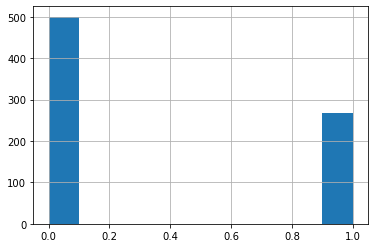

In [11]:
data['Outcome'].hist()
plt.show()

Разделите данные на признаки и целевую переменную. Разбейте датасет на тренировочную и тестовую части в отношении 70:30.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Outcome"], axis=1), data['Outcome'], 
                                                    train_size=0.7, 
                                                    random_state=228)

### Задание 3.1 (1 балл)

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [13]:
BG = BaggingClassifier(n_estimators=50)
BG.fit(X_train, y_train)

y_pred_BG = BG.predict(X_test)

In [14]:
ac_BG = accuracy_score(y_test, y_pred_BG)
pr_BG = precision_score(y_test, y_pred_BG)
re_BG = recall_score(y_test, y_pred_BG)
roc_BG = roc_auc_score(y_test, y_pred_BG)

In [15]:
print(f" accuracy score = {ac_BG}")
print(f" precision score = {pr_BG}")
print(f" recall score = {re_BG}")
print(f" roc_auc_score = {roc_BG}")

 accuracy score = 0.7575757575757576
 precision score = 0.7288135593220338
 recall score = 0.5180722891566265
 roc_auc_score = 0.7049820905242592


Не густо, не вкусно 🥴

### Задание 3.2 (1 балл)

Теперь обучите Random Forest с таким же количеством деревьев. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [16]:
RF = RandomForestClassifier(n_estimators=50)
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

In [17]:
ac_RF = accuracy_score(y_test, y_pred_RF)
pr_RF = precision_score(y_test, y_pred_RF)
re_RF = recall_score(y_test, y_pred_RF)
roc_RF = roc_auc_score(y_test, y_pred_RF)

In [18]:
print(f" accuracy score = {ac_RF}")
print(f" precision score = {pr_RF}")
print(f" recall score = {re_RF}")
print(f" roc_auc_score = {roc_RF}")

 accuracy score = 0.7748917748917749
 precision score = 0.7540983606557377
 recall score = 0.5542168674698795
 roc_auc_score = 0.7264327580592641


Все скакнуло кроме recall, так что:
    И густо, и вкусно 😉

Случайный лес победил!

### Задание 3.3 (1 балл)

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Используйте heat map для визуализации. Какие выводы вы можете сделать?

In [23]:
ne = []
msl = []
auc_ne = []
auc_msl = []
n_best = 0
msl_best = 0
flag = True
best = 0

# Если подбирать эти параметры по отдельности при к/дшных параметрах:
for i in range(10,1500,100):
    RF = RandomForestClassifier(n_estimators=int(i))
    RF.fit(X_train, y_train)
    y_pred_RF = RF.predict(X_test)
    roc_RF = roc_auc_score(y_test, y_pred_RF)
    if flag:
        n_best = i
        best = roc_RF
        flag = False
    elif roc_RF > best:
        n_best = i
        best = roc_RF
    
    ne.append(i)
    auc_ne.append(roc_RF)

flag = True

for i in range(1,15,1):
    RF = RandomForestClassifier(min_samples_leaf=int(i))
    RF.fit(X_train, y_train)
    y_pred_RF = RF.predict(X_test)
    roc_RF = roc_auc_score(y_test, y_pred_RF)
    if flag:
        msl_best = i
        best = roc_RF
        flag = False
    elif roc_RF > best:
        msl_best = i
        best = roc_RF
    
    msl.append(i)
    auc_msl.append(roc_RF)

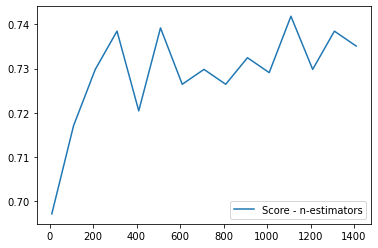

In [24]:
plt.plot(ne, auc_ne)
plt.legend(["Score - n-estimators"])
plt.show()

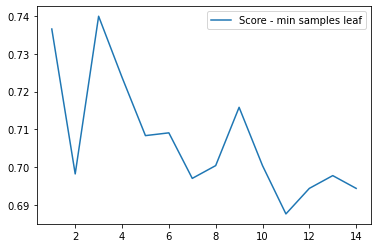

In [25]:
plt.plot(msl, auc_msl)
plt.legend(["Score - min samples leaf"])
plt.show()

In [26]:
print(f"Best parameters (separately):\n {n_best} estimators \n {msl_best} min samples leaf")

Best parameters (separately):
 1110 estimators 
 3 min samples leaf


 Следовательно лучшие параметры будут лежать в интервалах [2, 4] для минимального количества объектов в листе, и [400, 600] или [1000, 1300] для количества деревьев. Однако подбор осуществлялся по-отдельности, давайте рассмотрим его по сетке и сравним результаты:

In [253]:
#Подбираем по сетке
from sklearn.model_selection import GridSearchCV

param_test = {
    'n_estimators': range(10, 1500, 150),
    'min_samples_leaf': range(1,15,1)
}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'min_samples_leaf': range(1, 15),
                         'n_estimators': range(10, 1500, 50)},
             scoring='roc_auc')

In [31]:
gsearch1.best_params_, gsearch1.best_score_

({'min_samples_leaf': 10, 'n_estimators': 310}, 0.826692044156833)

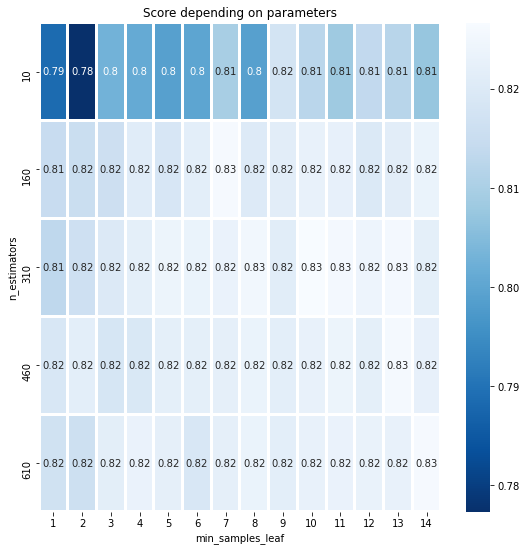

In [252]:
df_hm = pd.DataFrame({
    'n_estimators' : np.array(gsearch1.cv_results_["param_n_estimators"]),
    'min_samples_leaf' : np.array(gsearch1.cv_results_['param_min_samples_leaf']),
    'auc' : np.array(gsearch1.cv_results_['mean_test_score'])
})

pivot = df_hm.pivot('n_estimators', 'min_samples_leaf', 'auc').head()
plt.figure(figsize=(9, 9))
plt.title("Score depending on parameters")
sns.heatmap(pivot, annot = True, linewidths = 2, cmap = 'Blues_r')
plt.show()

Выводы довольно интересны, хоть и объяснимы за счет изменения точности модели при предсказывании одновременно нескольких параметров. Таким образом, лучшем будут следущее гип параметры: min_samples_leaf = 10 и n_estimators = 310

### Задание 3.4 (1 балл)

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

In [41]:
clf = RandomForestClassifier(min_samples_leaf = 10, n_estimators = 310)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=310)

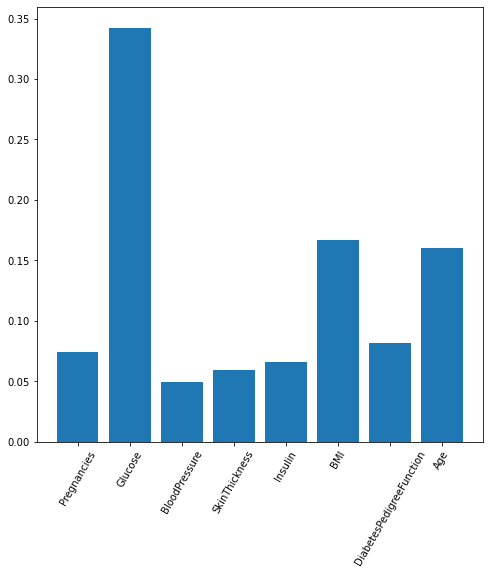

In [57]:
values = clf.feature_importances_
feutures = X_train.columns

plt.figure(figsize=(8, 8))
plt.bar(feutures, values)
plt.xticks(rotation=60)
plt.show()

 Из модели получается, что сильным признаком для определение диабета служит уровень глюкозы в крови